In [49]:
import logging

import numpy as np
import astropy.io.ascii as at
import matplotlib.pyplot as plt
%matplotlib inline

from k2spin import lc
from k2spin import k2io
from k2spin import plot
from k2spin import evaluate
reload(evaluate)
reload(lc)

logging.basicConfig(level=logging.INFO)

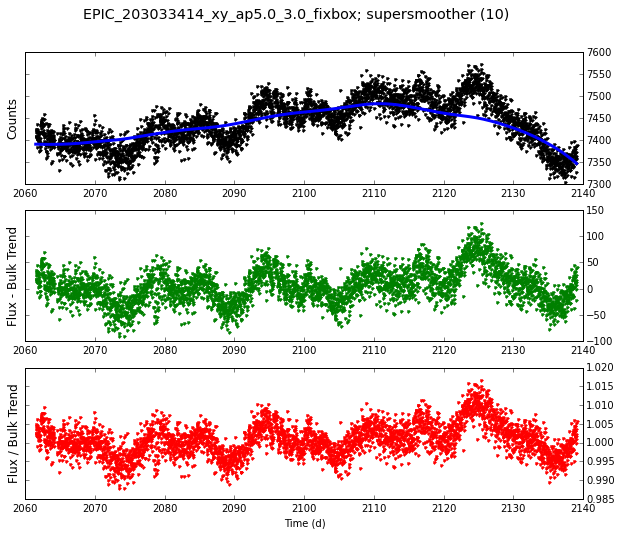

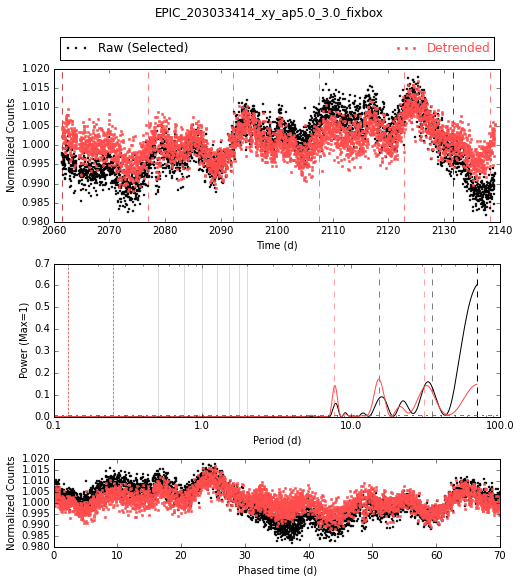

In [50]:
lc_dir = "/home/stephanie/code/python/k2spin/lcs/"
#filename = "EPIC_202521690_xy_ap5.0_3.0_fixbox.dat"
#filename = "EPIC_202593561_xy_ap5.0_3.0_fixbox.dat"
#filename = "EPIC_202585030_xy_ap5.0_3.0_fixbox.dat"
filename = "EPIC_203033414_xy_ap5.0_3.0_fixbox.dat"

lc_out = k2io.read_double_aperture(lc_dir+filename)
time, fluxes, unc_fluxes, x_pos, y_pos, qual_flux, apertures = lc_out
    
light_curve = lc.LightCurve(time, fluxes[1], unc_fluxes[1], x_pos, y_pos,
                                name=filename[:-4],
                            detrend_kwargs={"kind":"supersmoother","phaser":10})
light_curve.choose_initial()
#light_curve.correct_and_fit()

t = light_curve.time
y = light_curve.det_flux
dy = light_curve.det_unc

t = light_curve.time
y = light_curve.flux
dy = light_curve.unc_flux


In [51]:
reload(evaluate)
powers, periods = evaluate.better_peak_finder(light_curve.init_periods_to_test,
                                              light_curve.init_pgram, 0.5)

0 70.0 0.602975677536
0
new max period  56.0
0.100003328682 56.0 False
0 55.7191753562 0.347172039168
1
new max period  44.8
0.100003328682 44.8 False
24 32.6843161974 0.160048274698


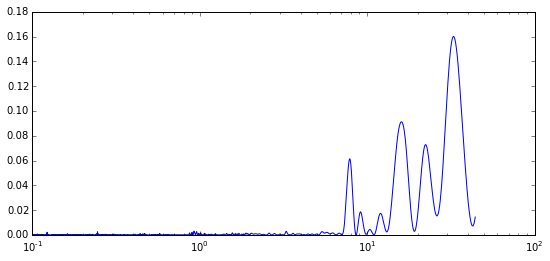

In [52]:
plt.figure(figsize=(9,4))
plt.plot(periods, powers)
plt.xscale("log")

Not enough - maybe something with peak width??? Or something smarter (argrelextrema!) that looks for multiple peaks, and tries to find one that *isn't* in the two bad categories. And here's where to incorporate the bootstrapped power threshold - any peak that's, say 2-10 times higher than that threshold (because the threshold is stupidly low...)